# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [20]:
from utils import get_dataset

In [21]:
dataset = get_dataset("/content/nd013-c1-vision-starter/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/content/nd013-c1-vision-starter/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/content/nd013-c1-vision-starter/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle
BATCH_SIZE = 1
#BATCH_SIZE = 4

In [32]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE  

    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    if BATCH_SIZE == 1:
        rows, columns = 1, 1
    elif BATCH_SIZE == 4:
        rows, columns = 2, 2

    f, ax = plt.subplots(rows, columns, figsize=(rows*10, columns*10))
    for i, data in enumerate(batch):
        x = i // columns
        y = i % columns
      
        filename =data["filename"]
        img = data["image"].numpy()
        if BATCH_SIZE == 1:
            ax.imshow(img)
        elif BATCH_SIZE == 4:
            ax[x, y].imshow(img)
      
        bboxes = data["groundtruth_boxes"].numpy()
        classes = data["groundtruth_classes"].numpy()

        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            y1 = y1*img.shape[0]
            x1 = x1*img.shape[1]
            y2 = y2*img.shape[0]
            x2 = x2*img.shape[1]

            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                          edgecolor=colormap[cl])
            if BATCH_SIZE == 1:
                ax.add_patch(rec)
                ax.axis('off')
            elif BATCH_SIZE == 4:
                ax[x, y].add_patch(rec)
                ax[x ,y].axis('off')
        #ax[x ,y].axis('off')
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

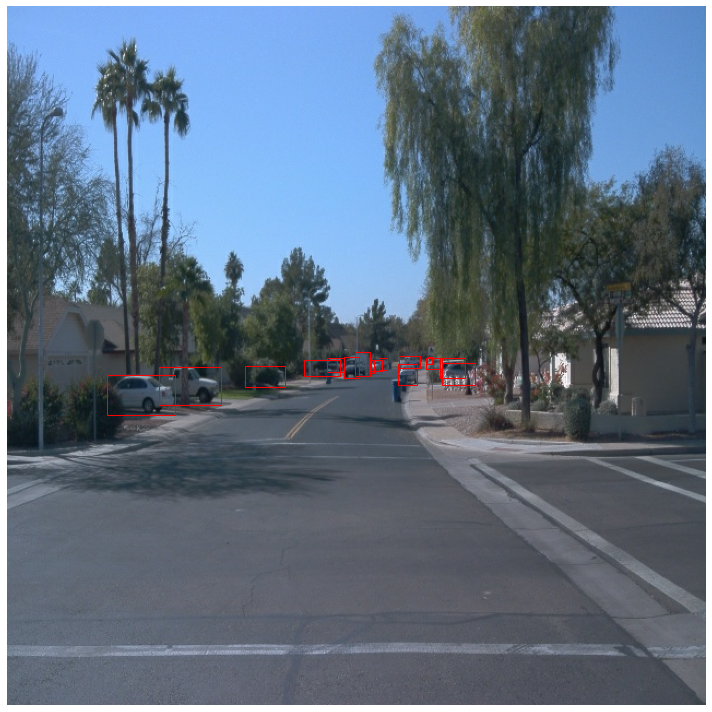

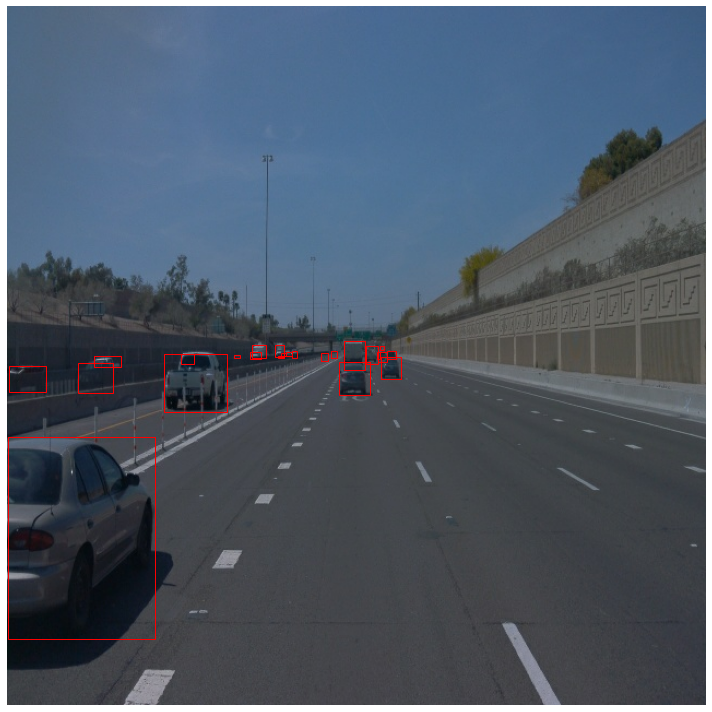

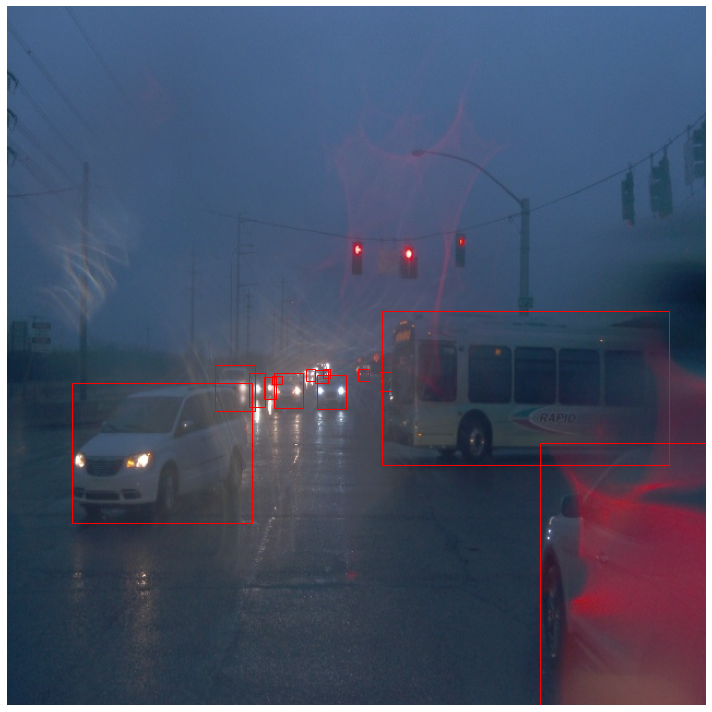

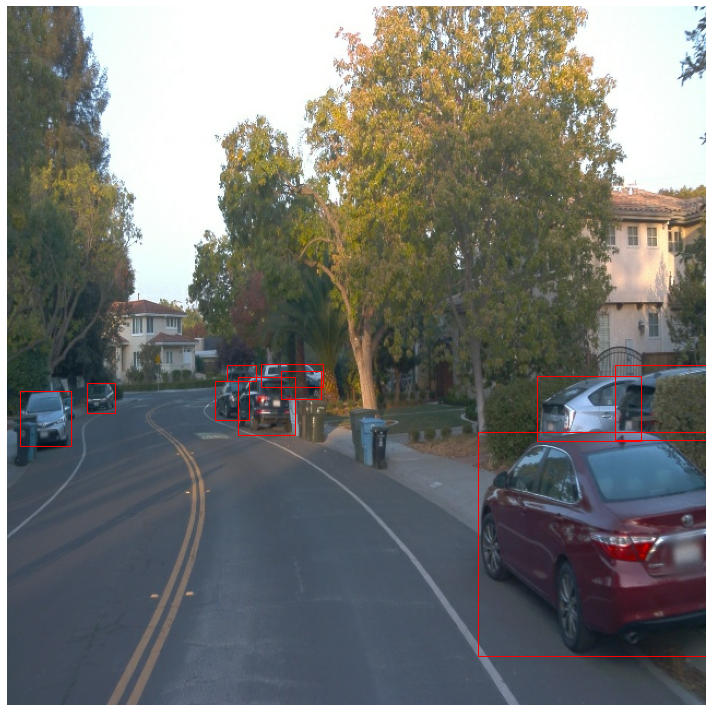

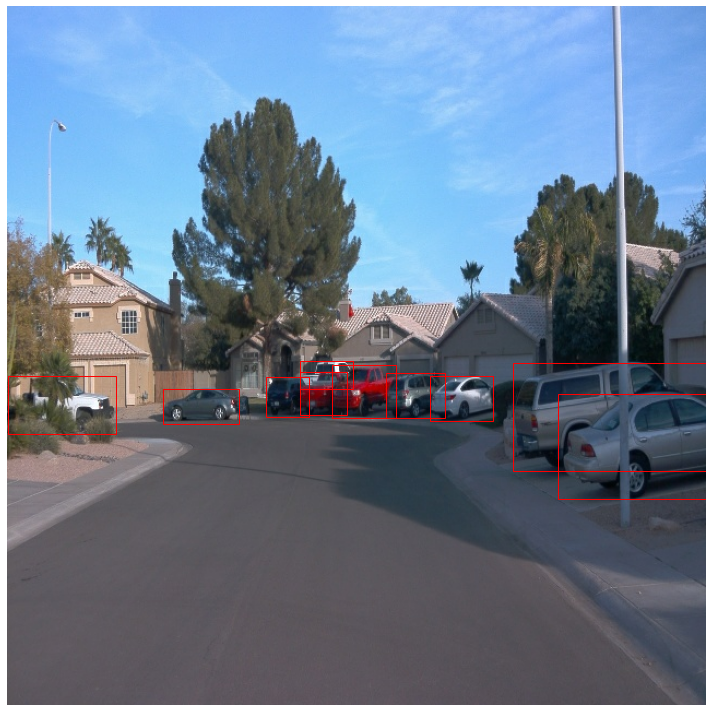

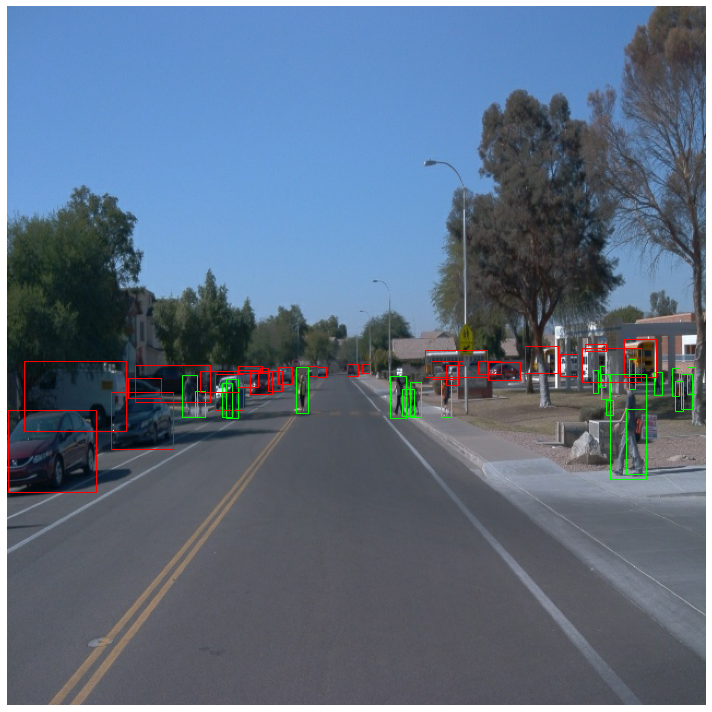

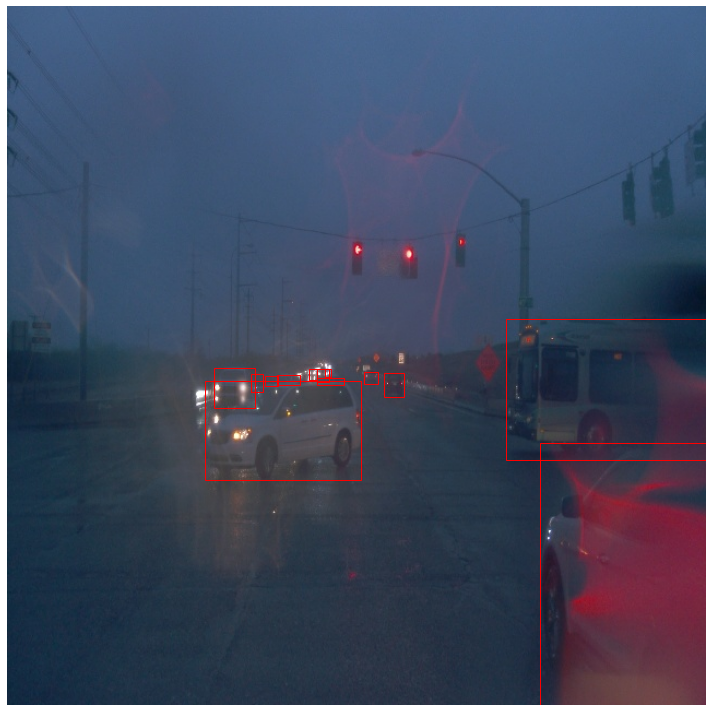

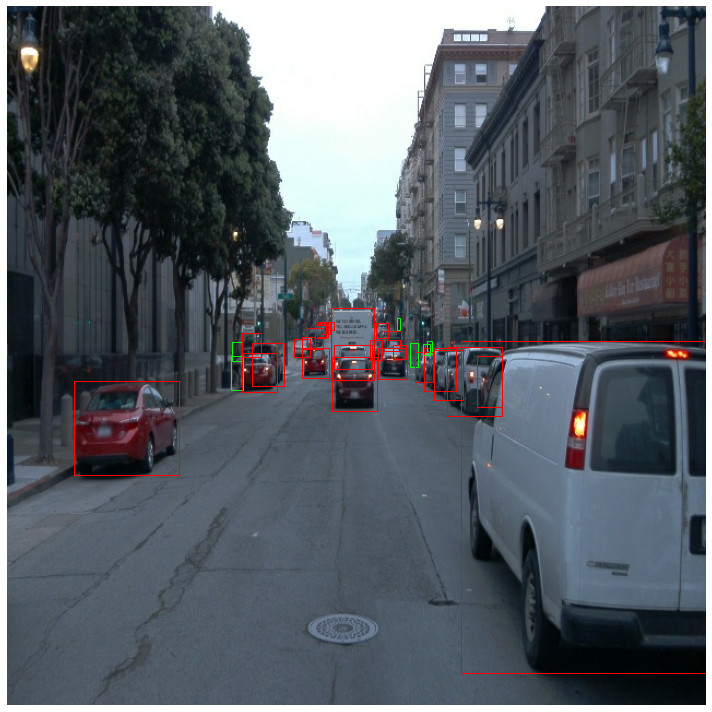

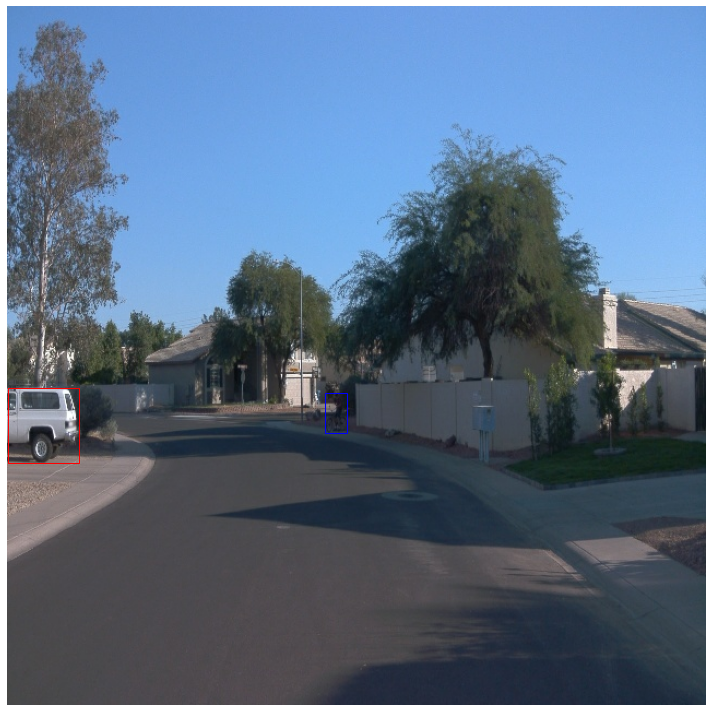

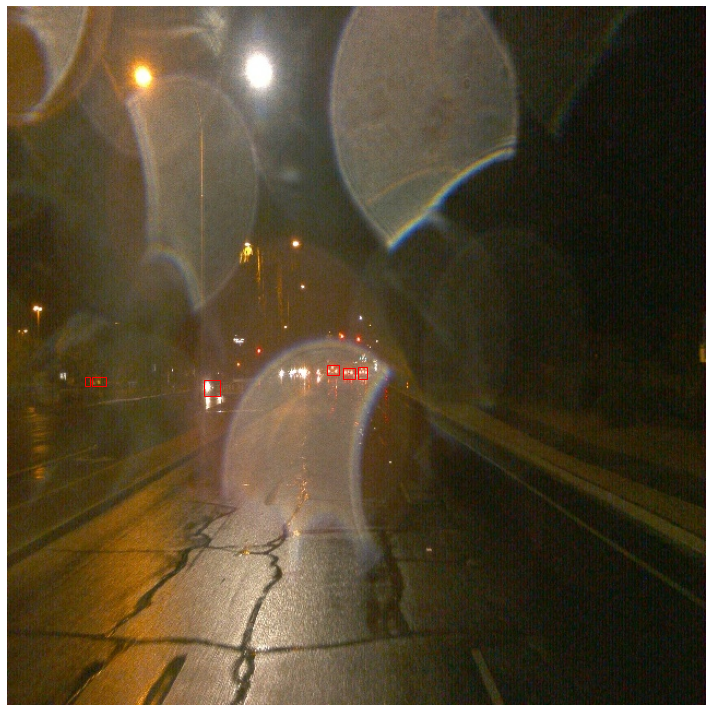

In [33]:
number_of_images = 10
for i in range(number_of_images):
    batch = dataset.take(BATCH_SIZE)
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [34]:
labels = {1: 0, 2 : 0, 4: 0 }
labels_dist= {1:[], 2:[], 4:[]}


for batches in dataset.take(2000):
    #map using dict
    try:
        object_count = {1: 0, 2 : 0, 4: 0 }
        for l in batches["groundtruth_classes"].numpy():
            labels[l] += 1
            object_count[l] += 1
            labels_dist[l].append(object_count[l])
    except Exception as err:
        print(err)

In [35]:
labels

{1: 35813, 2: 10053, 4: 282}

[Text(0, 0.5, 'Number of Objects'),
 Text(0.5, 0, 'Classes'),
 Text(0.5, 1.0, 'Distrubution of Classes for 20000 random images')]

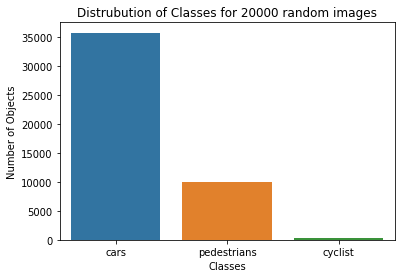

In [36]:
import seaborn as sns

label_map = {"cars": labels[1], "pedestrians": labels[2], "cyclist": labels[4]}
keys = list(label_map.keys())

#Simple dict mapping to convert to labels from strings
vals = [label_map[k] for k in keys]

# plot
ax = sns.barplot(x=keys, y=vals)
ax.set(xlabel='Classes', ylabel='Number of Objects', title='Distrubution of Classes for 20000 random images')

* Distrubution of Classes for 20000 random images
* As can be seen from the distribution, there are many vehicle classes and few cyclists.

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Number of Cars'),
 Text(0.5, 1.0, 'Distribution of Number of Cars in Images')]

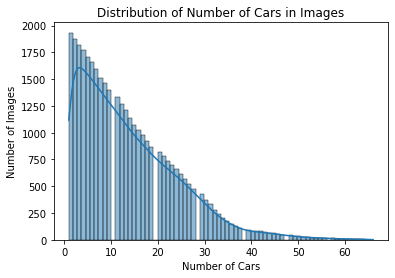

In [37]:
label_dist_map = {"cars": labels_dist[1], "pedestrians": labels_dist[2], "cyclist": labels_dist[4]}
ax_cars = sns.histplot(data=label_dist_map["cars"], kde=True)
ax_cars.set(xlabel='Number of Cars', ylabel='Number of Images', title='Distribution of Number of Cars in Images')

* Distribution of Number of Cars in Images
* The highest point is when the number of vehicles per image is 0, and it gradually decreases, so it is rarely more than 60.

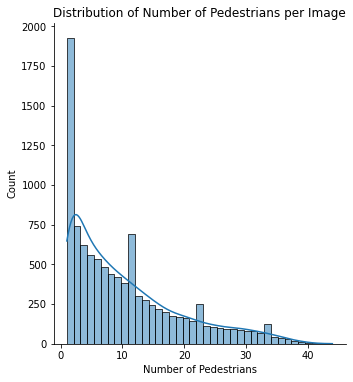

In [38]:
ax_ped= sns.displot(label_dist_map["pedestrians"], kde=True)
ax_ped.set(xlabel='Number of Pedestrians', title='Distribution of Number of Pedestrians per Image')

* Distribution of Number of Pedestrians per Image
* The highest point is when the number of pedestrians per image is 0, and the number of pedestrians per image is the highest, and it is rarely more than 40.

<Figure size 1080x1080 with 0 Axes>

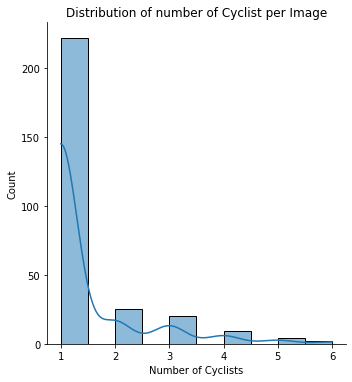

In [39]:
plt.figure(figsize=(15, 15))
ax_cy= sns.displot(label_dist_map["cyclist"], kde=True)
ax_cy.set(xlabel='Number of Cyclists', title='Distribution of number of Cyclist per Image')
plt.show()

* Distribution of number of Cyclist per Image
* The cyclist is also often not included in the image, and it is slightly distributed among 2-6 people.